# COVID-19 Data Analysis Project using Python

**Dataset URL:** https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv

This notebook performs comprehensive analysis on COVID-19 data including data understanding, cleaning, aggregation, feature engineering, and visualization.

## Import Required Libraries

In [30]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


## 1. Import the Dataset using Pandas

In [31]:

url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"

try:
    df = pd.read_csv(url)
    print(f"✓ Dataset shape: {df.shape}")
    display(df.head())
except Exception as e:
    print(f" Error importing dataset: {e}")

✓ Dataset shape: (57394, 49)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


## 2. High Level Data Understanding

### 2a. Find Number of Rows & Columns

In [33]:

print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"\nColumn names:")
print(list(df.columns))

Number of rows: 57394
Number of columns: 49

Column names:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_per_case', 'positive_rate', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',

### 2b. Data Types of Columns

In [32]:

print(df.dtypes)

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

### 2c. Info & Describe of Data

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [36]:
display(df.describe())

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.375800e+04,56465.000000,55652.000000,4.436800e+04,56465.000000,55652.000000,53471.000000,56401.000000,55587.000000,44096.000000,56401.000000,55587.000000,37696.000000,4490.000000,4490.000000,5005.000000,5005.000000,357.000000,357.000000,645.000000,645.000000,2.201700e+04,2.178700e+04,22017.000000,21787.000000,2.461200e+04,24612.000000,22802.000000,23211.000000,47847.000000,5.707100e+04,54371.000000,51034.000000,50265.000000,50768.000000,50367.000000,33571.000000,51013.000000,52881.000000,39669.000000,39156.000000,24176.000000,45936.000000,56336.000000,49247.000000
mean,1.677974e+05,1953.576941,1920.431953,6.858639e+03,47.054317,46.835439,3139.099982,39.344804,38.403211,95.335293,0.679569,0.667060,1.044593,726.191982,13.264264,3867.245355,76.562638,249.262364,7.284022,2230.688121,60.655074,2.309838e+06,2.847832e+04,78.917684,0.916091,2.738971e+04,0.897875,182.917899,0.067968,56.981128,8.559938e+07,360.490650,31.189576,9.179238,5.800115,20620.172071,12.435453,252.646642,8.070269,10.741569,32.642686,52.089636,3.089724,73.937780,0.722223
std,1.693038e+06,18269.650340,17777.391785,5.578081e+04,390.853776,378.272794,6183.455260,133.985155,101.649441,180.721699,3.026430,1.968914,0.395932,2031.110506,18.788717,9952.989504,109.079014,545.005400,18.182646,5305.474602,174.848637,1.053218e+07,1.149094e+05,157.727167,1.696732,1.059809e+05,1.569310,877.852736,0.088833,25.845576,6.017270e+08,1639.740138,9.044262,6.297170,4.295740,20310.999832,19.427924,117.522344,4.189605,10.470743,13.453566,31.645306,2.513193,7.397016,0.153261
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,-67.901000,-9.678000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,-3.743000e+03,0.000000,-0.398000,0.000000e+00,0.000000,1.535000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.800000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,90.033000,0.000000,0.260000,3.977750,0.000000,0.000000,0.870000,9.000000,1.683750,38.000000,10.554000,4.027000,0.816000,20.137000,4.167000,6.082500e+04,1.039000e+03,4.047000,0.073000,1.108750e+03,0.074000,10.607500,0.010000,39.810000,1.326539e+06,37.728000,23.200000,3.552000,2.085000,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,2.070000e+03,14.000000,19.429000,8.400000e+01,0.000000,0.286000,593.663000,2.194000,3.863000,20.383000,0.000000,0.028000,1.040000,48.000000,5.901000,213.000000,35.548000,25.778000,2.083000,146.811000,14.997000,2.656400e+05,3.715000e+03,20.965000,0.344000,4.024000e+03,0.350500,29.369000,0.033000,60.650000,8.278737e+06,88.125000,31.100000,6.933000,4.393000,13913.839000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.345000,0.752000
75%,2.235675e+04,235.000000,245.286000,7.270000e+02,4.000000,4.000000,3487.050000,25.941000,29.678500,90.571250,0.294000,0.420000,1.220000,293.000000,17.462000,1617.000000,93.386000,233.091000,6.07600

## 3. Low Level Data Understanding

### 3a. Count of Unique Values in Location Column

In [37]:
unique_locations = df['location'].nunique()
print(f"Number of unique locations: {unique_locations}")
print(f"\nSample locations:")
print(df['location'].unique()[:10])

Number of unique locations: 216

Sample locations:
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba']


### 3b. Continent with Maximum Frequency

In [38]:
continent_counts = df['continent'].value_counts()
print("Continent frequency counts:")
print(continent_counts)
print(f"\nContinent with maximum frequency: {continent_counts.index[0]}")

Continent frequency counts:
continent
Europe           14828
Africa           13637
Asia             13528
North America     9116
South America     3404
Oceania           2235
Name: count, dtype: int64

Continent with maximum frequency: Europe


### 3c. Maximum & Mean Value in 'total_cases'

In [39]:
max_cases = df['total_cases'].max()
mean_cases = df['total_cases'].mean()

print(f"Maximum total_cases: {max_cases:,.0f}")
print(f"Mean total_cases: {mean_cases:,.2f}")

Maximum total_cases: 55,154,651
Mean total_cases: 167,797.37


### 3d. Quartile Values in 'total_deaths'

In [40]:
quartiles = df['total_deaths'].quantile([0.25, 0.50, 0.75])
print("Total Deaths Quartiles:")
print(f"25% quartile: {quartiles[0.25]:,.0f}")
print(f"50% quartile (median): {quartiles[0.50]:,.0f}")
print(f"75% quartile: {quartiles[0.75]:,.0f}")

Total Deaths Quartiles:
25% quartile: 13
50% quartile (median): 84
75% quartile: 727


### 3e. Continent with Maximum 'human_development_index'

In [41]:
hdi_by_continent = df.groupby('continent')['human_development_index'].max().sort_values(ascending=False)
print("Human Development Index by Continent:")
print(hdi_by_continent)
print(f"\nContinent with maximum HDI: {hdi_by_continent.index[0]}")

Human Development Index by Continent:
continent
Europe           0.953
Oceania          0.939
Asia             0.933
North America    0.926
South America    0.843
Africa           0.797
Name: human_development_index, dtype: float64

Continent with maximum HDI: Europe


### 3f. Continent with Minimum 'gdp_per_capita'

In [42]:
gdp_by_continent = df.groupby('continent')['gdp_per_capita'].min().sort_values()
print("GDP per Capita by Continent (minimum values):")
print(gdp_by_continent)
print(f"\nContinent with minimum GDP per capita: {gdp_by_continent.index[0]}")

GDP per Capita by Continent (minimum values):
continent
Africa            661.240
Asia             1479.147
North America    1653.173
Oceania          2205.923
Europe           5189.972
South America    6885.829
Name: gdp_per_capita, dtype: float64

Continent with minimum GDP per capita: Africa


## 4. Filter the Dataframe with Required Columns

In [43]:
required_columns = ['continent', 'location', 'date', 'total_cases',
                   'total_deaths', 'gdp_per_capita', 'human_development_index']

df = df[required_columns].copy()
print(f"✓ Dataframe filtered with {len(required_columns)} columns")
print(f"✓ New shape: {df.shape}")
print(f"\nFiltered dataframe:")
display(df.head())

✓ Dataframe filtered with 7 columns
✓ New shape: (57394, 7)

Filtered dataframe:


,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498


## 5. Data Cleaning

### 5a. Remove Duplicate Observations

In [45]:
# Remove duplicates
duplicates_before = df.duplicated().sum()
print(f"Duplicates before removal: {duplicates_before}")

df = df.drop_duplicates()
duplicates_after = df.duplicated().sum()
print(f"Duplicates after removal: {duplicates_after}")
print(f"New shape after removing duplicates: {df.shape}")

Duplicates before removal: 0
Duplicates after removal: 0
New shape after removing duplicates: (57394, 7)


### 5b. Find Missing Values in All Columns

In [44]:
# Find missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

Missing values in each column:
continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64

Total missing values: 32482


### 5c. Remove Observations Where Continent is Missing

In [46]:
# Remove rows where continent is missing
rows_before = df.shape[0]
df = df.dropna(subset=['continent'])
rows_after = df.shape[0]

print(f"Rows before removing missing continents: {rows_before}")
print(f"Rows after removing missing continents: {rows_after}")
print(f"Rows removed: {rows_before - rows_after}")
print(f"New shape: {df.shape}")

Rows before removing missing continents: 57394
Rows after removing missing continents: 56748
Rows removed: 646
New shape: (56748, 7)


### 5d. Fill Missing Values with 0

In [47]:
# Fill remaining missing values with 0
print("Missing values before filling:")
print(df.isnull().sum())

df = df.fillna(0)

print("\nMissing values after filling with 0:")
print(df.isnull().sum())

Missing values before filling:
continent                      0
location                       0
date                           0
total_cases                 3600
total_deaths               12964
gdp_per_capita              6704
human_development_index     7501
dtype: int64

Missing values after filling with 0:
continent                  0
location                   0
date                       0
total_cases                0
total_deaths               0
gdp_per_capita             0
human_development_index    0
dtype: int64


## 6. Date Time Format

### 6a. Convert Date Column to DateTime Format

In [50]:
print(f"Date column data type before conversion: {df['date'].dtype}")

df['date'] = pd.to_datetime(df['date'])

print(f"Date column data type after conversion: {df['date'].dtype}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")

Date column data type before conversion: datetime64[ns]
Date column data type after conversion: datetime64[ns]
Date range: 2019-12-31 00:00:00 to 2020-12-11 00:00:00


### 6b. Create New Month Column

In [51]:
# Create month column
df['month'] = df['date'].dt.month
print("✓ Month column created successfully")

print("\nMonth distribution:")
month_counts = df['month'].value_counts().sort_index()
print(month_counts)

print(f"\nDataframe with new month column:")
display(df.head())

✓ Month column created successfully

Month distribution:
month
1     3133
2     3098
3     5094
4     5583
5     5856
6     5657
7     5872
8     5872
9     5689
10    5934
11    2971
12    1989
Name: count, dtype: int64

Dataframe with new month column:


,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498,12
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498,1
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498,2
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498,3
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498,4


## 7. Data Aggregation

### 7a. Group by Continent and Find Maximum Values

In [20]:
# Group by continent and find max values
df_groupby = df.groupby('continent').max().reset_index()

print(f"✓ Aggregated dataframe created")
print(f"Shape of df_groupby: {df_groupby.shape}")
print(f"\nAggregated data (df_groupby):")
display(df_groupby)

✓ Aggregated dataframe created
Shape of df_groupby: (6, 8)

Aggregated data (df_groupby):


,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


## 8. Feature Engineering

### 8a. Create 'total_deaths_to_total_cases' Ratio Feature

In [21]:
# Create death to cases ratio feature
df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths'] / df_groupby['total_cases']

# Handle division by zero (replace NaN with 0)
df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths_to_total_cases'].fillna(0)

print("✓ Feature 'total_deaths_to_total_cases' created successfully")
print("\nDeath to case ratios by continent:")
ratio_summary = df_groupby[['continent', 'total_deaths_to_total_cases']].round(4)
display(ratio_summary)

✓ Feature 'total_deaths_to_total_cases' created successfully

Death to case ratios by continent:


,continent,total_deaths_to_total_cases
0,Africa,0.0270
1,Asia,0.0147
2,Europe,0.0262
3,North America,0.0221
4,Oceania,0.0327
5,South America,0.0283


## 9. Data Visualization

### 9a. Univariate Analysis on 'gdp_per_capita' using Histogram

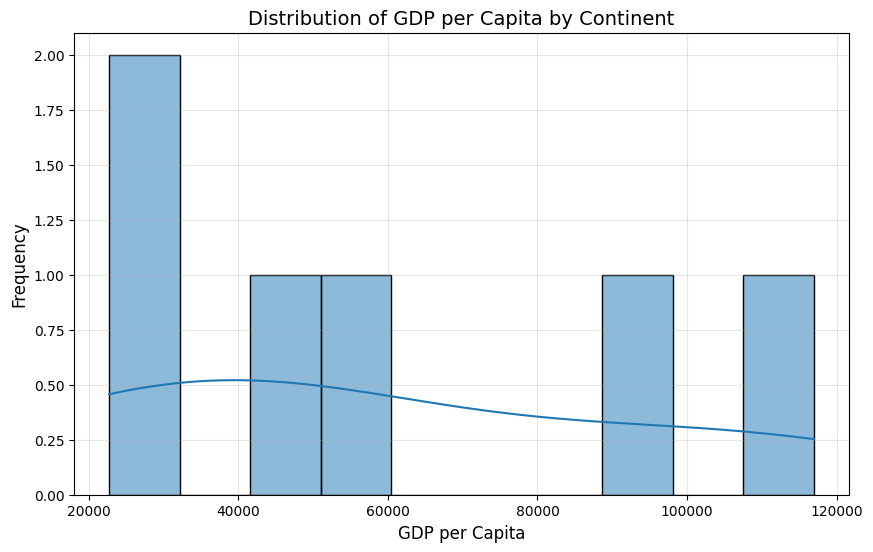

GDP per capita statistics:
count         6.000000
mean      59872.840833
std       37952.591887
min       22767.037000
25%       30948.892750
50%       49437.078000
75%       84264.835250
max      116935.600000
Name: gdp_per_capita, dtype: float64


In [22]:
# Histogram for GDP per capita
plt.figure(figsize=(10, 6))
sns.histplot(data=df_groupby, x='gdp_per_capita', kde=True, bins=10)
plt.title('Distribution of GDP per Capita by Continent', fontsize=14)
plt.xlabel('GDP per Capita', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print(f"GDP per capita statistics:")
print(df_groupby['gdp_per_capita'].describe())

### 9b. Scatter Plot of 'total_cases' & 'gdp_per_capita'

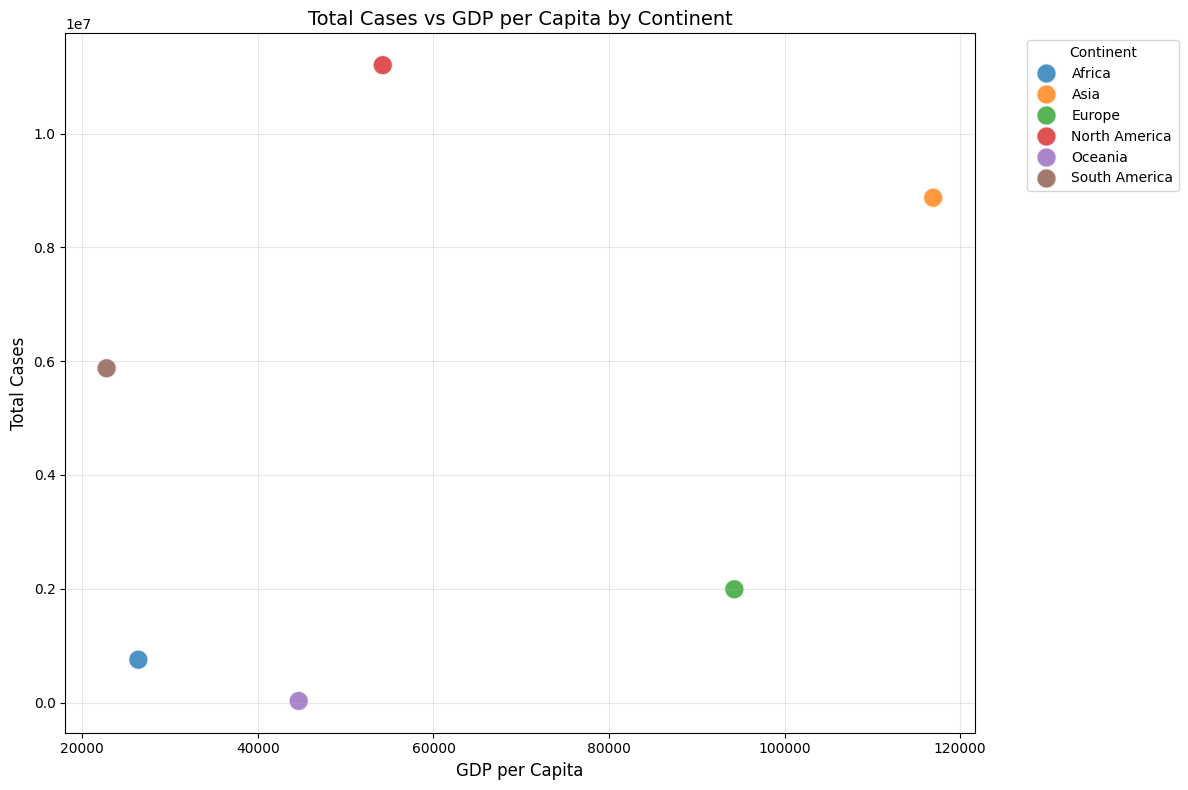

In [23]:
# Scatter plot of total cases vs GDP per capita
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_groupby, x='gdp_per_capita', y='total_cases',
                hue='continent', s=200, alpha=0.8)
plt.title('Total Cases vs GDP per Capita by Continent', fontsize=14)
plt.xlabel('GDP per Capita', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 9c. Pairplot on df_groupby Dataset

<Figure size 1500x1200 with 0 Axes>

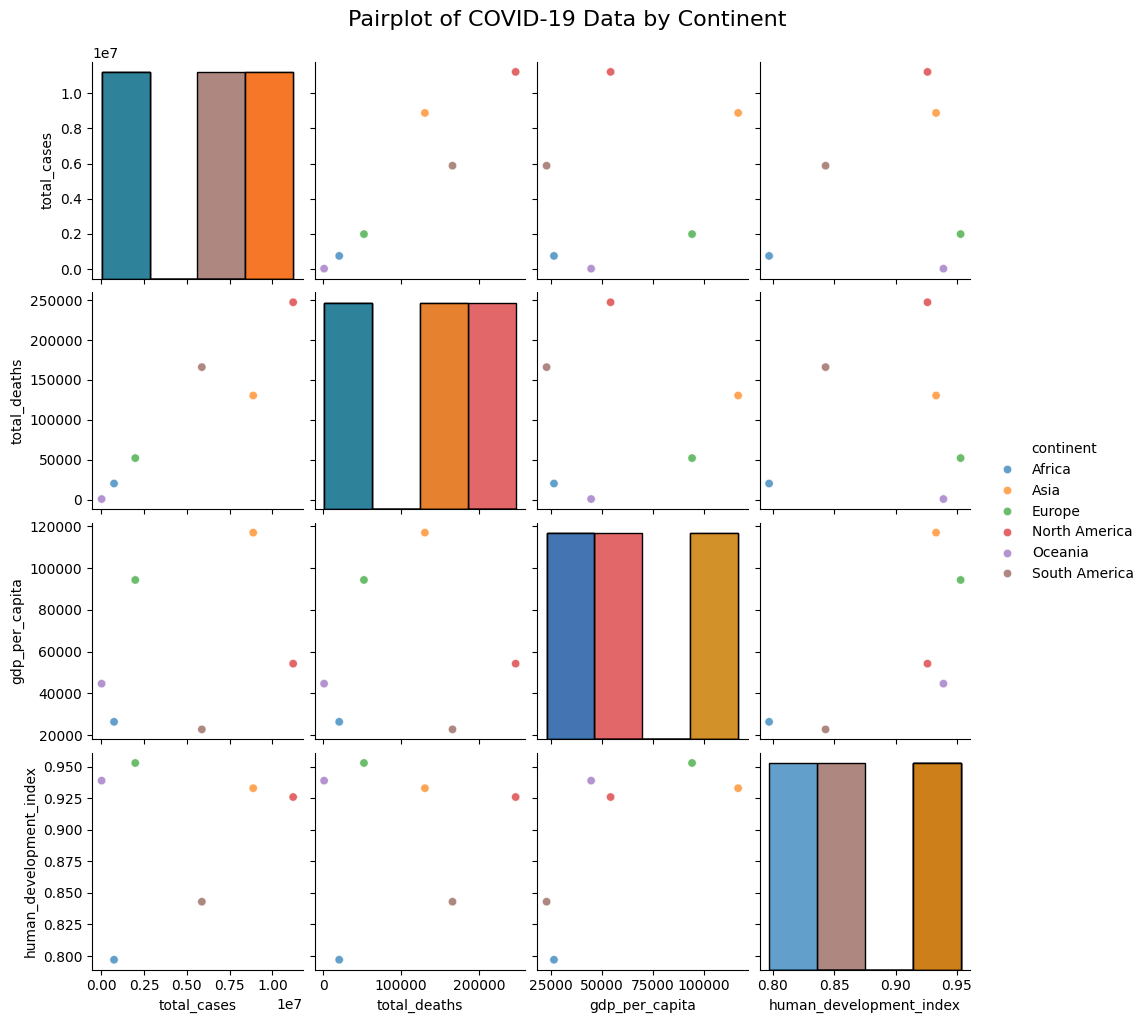

In [24]:
# Pairplot of key numeric variables
numeric_cols = ['total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']
pairplot_data = df_groupby[numeric_cols + ['continent']]

plt.figure(figsize=(15, 12))
pairplot = sns.pairplot(pairplot_data, hue='continent', diag_kind='hist',
                       plot_kws={'alpha': 0.7}, diag_kws={'alpha': 0.7})
pairplot.fig.suptitle('Pairplot of COVID-19 Data by Continent', y=1.02, fontsize=16)
plt.show()

### 9d. Bar Plot of 'continent' vs 'total_cases'

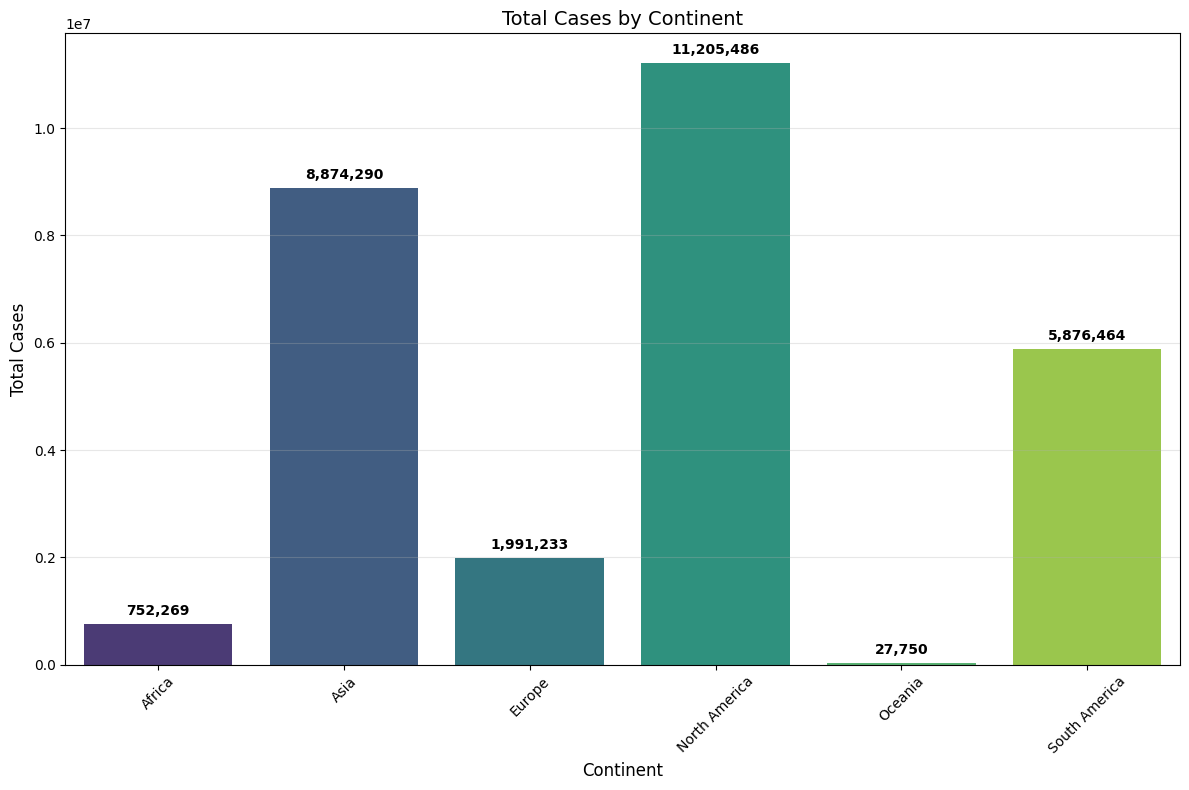

In [25]:
# Bar plot of continent vs total cases
plt.figure(figsize=(12, 8))
sns.barplot(data=df_groupby, x='continent', y='total_cases', palette='viridis')
plt.title('Total Cases by Continent', fontsize=14)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, v in enumerate(df_groupby['total_cases']):
    plt.text(i, v + max(df_groupby['total_cases']) * 0.01, f'{v:,.0f}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### Additional Visualizations

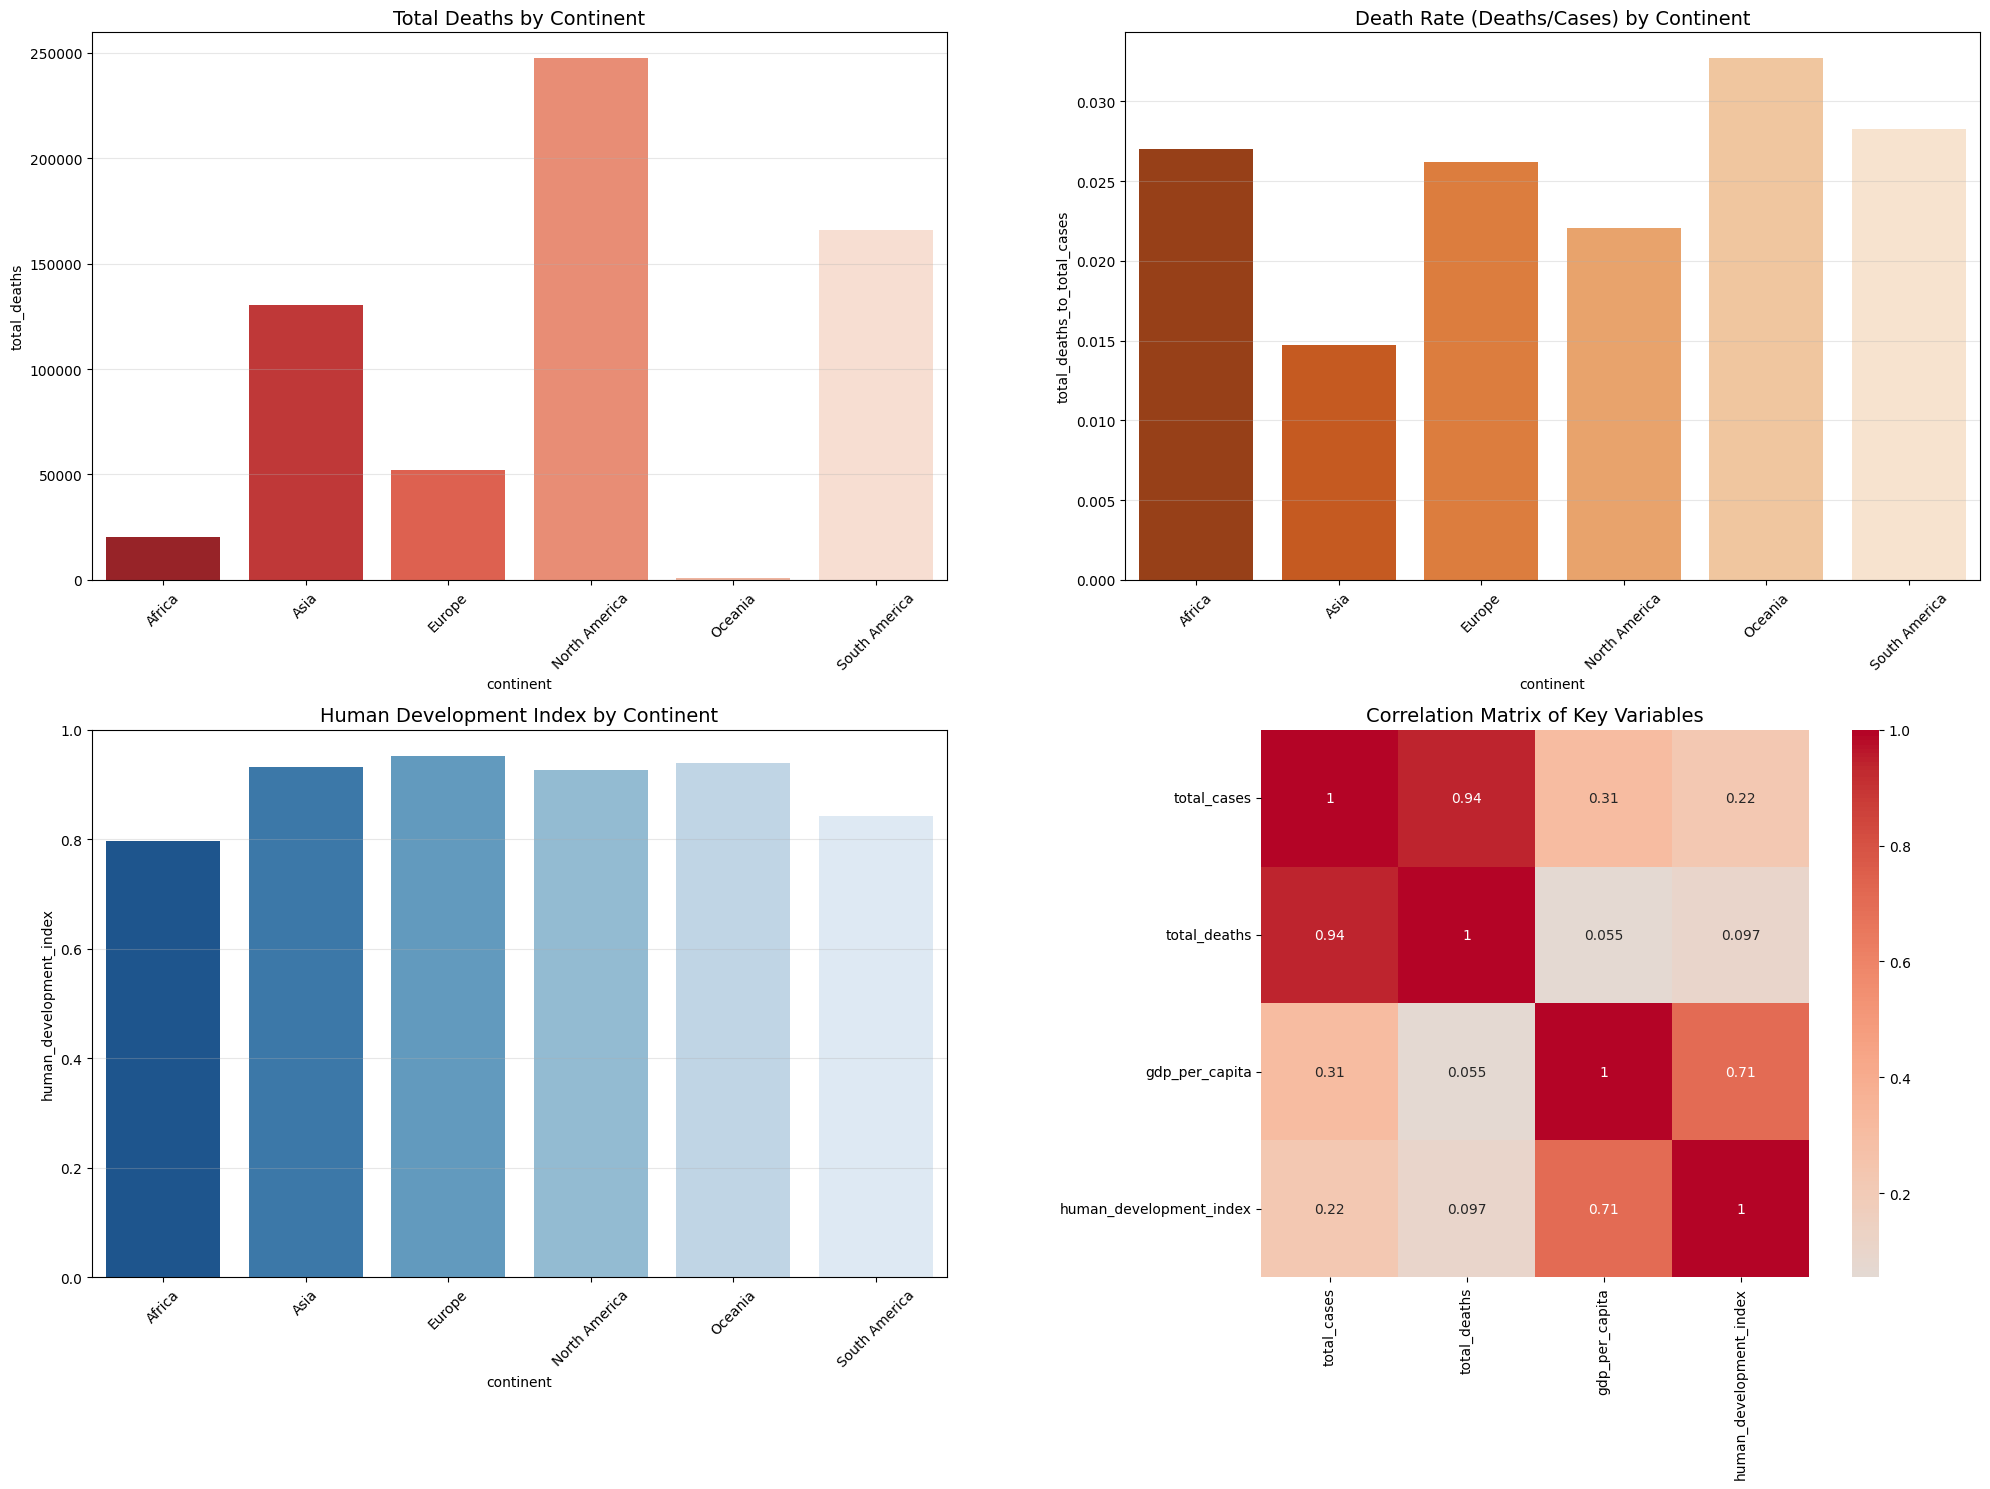

In [26]:
# Additional comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Total Deaths by Continent
sns.barplot(data=df_groupby, x='continent', y='total_deaths', ax=axes[0,0], palette='Reds_r')
axes[0,0].set_title('Total Deaths by Continent', fontsize=14)
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3, axis='y')

# 2. Death Rate by Continent
sns.barplot(data=df_groupby, x='continent', y='total_deaths_to_total_cases',
            ax=axes[0,1], palette='Oranges_r')
axes[0,1].set_title('Death Rate (Deaths/Cases) by Continent', fontsize=14)
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3, axis='y')

# 3. Human Development Index by Continent
sns.barplot(data=df_groupby, x='continent', y='human_development_index',
            ax=axes[1,0], palette='Blues_r')
axes[1,0].set_title('Human Development Index by Continent', fontsize=14)
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3, axis='y')

# 4. Correlation Heatmap
correlation_matrix = df_groupby[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            ax=axes[1,1], square=True)
axes[1,1].set_title('Correlation Matrix of Key Variables', fontsize=14)

plt.tight_layout()
plt.show()

## 10. Save the df_groupby Dataframe

In [27]:
# Save the aggregated dataframe to CSV
output_filename = 'covid_analysis_groupby_results.csv'

try:
    df_groupby.to_csv(output_filename, index=False)
    print(f"✓ Dataframe saved successfully as '{output_filename}'")
    print(f"✓ File location: Current working directory")
    print(f"✓ File size: {df_groupby.shape[0]} rows × {df_groupby.shape[1]} columns")
except Exception as e:
    print(f"✗ Error saving dataframe: {e}")

✓ Dataframe saved successfully as 'covid_analysis_groupby_results.csv'
✓ File location: Current working directory
✓ File size: 6 rows × 9 columns


## Final Summary and Results

In [54]:
print(f"• Original dataset shape: {df.shape}")
print(f"• Aggregated dataset shape: {df_groupby.shape}")
print(f"• Unique continents analyzed: {df_groupby['continent'].nunique()}")
print(f"• Date range analyzed: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")
print(f"• Output file created: {output_filename}")
print(f"• New feature created: total_deaths_to_total_cases")

print(f"\n FINAL AGGREGATED DATASET (df_groupby):")

display(df_groupby.round(2))



• Original dataset shape: (56748, 8)
• Aggregated dataset shape: (6, 9)
• Unique continents analyzed: 6
• Date range analyzed: 2019-12-31 to 2020-12-11
• Output file created: covid_analysis_groupby_results.csv
• New feature created: total_deaths_to_total_cases

 FINAL AGGREGATED DATASET (df_groupby):


,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month,total_deaths_to_total_cases
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.29,0.80,12,0.03
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.60,0.93,12,0.01
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.96,0.95,12,0.03
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.45,0.93,12,0.02
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.71,0.94,12,0.03
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.04,0.84,12,0.03


## Key Insights

Based on the analysis performed, here are some key insights:

1. **Data Overview**: The dataset contains COVID-19 information across multiple continents
2. **Continent Analysis**: Different continents show varying patterns in cases, deaths, and economic indicators
3. **Economic Correlation**: Relationship between GDP per capita and COVID-19 impact varies by continent
4. **Death Rates**: The death-to-case ratio provides insights into healthcare effectiveness across regions
5. **Development Index**: Human development index shows correlation with pandemic management

The aggregated dataset (`df_groupby`) provides continent-level maximum values for all key metrics and has been saved for future analysis.